# **Projeto desafio 1 - vendas online** 💵 🥇:

---

O objetivo desse projeto é realizar uma análise dos resultados de um evento com os clientes de uma empresa de vendas online.
Foi coletado um conjunto de dados que contém os clientes que mais gastaram com produtos dentro de 5 dias de vendas, que é o período de duração do evento.
Essa análise vai identificar o cliente com a maior compra na semana, que irá receber um prêmio da loja, e posteriormente, ela pode ajudar a empresa a criar novas estratégias para atrair mais clientes.

A base de dados utilizada nessa análise é a [dados_vendas_clientes.json](https://raw.githubusercontent.com/Marina-Falcao-DEV/Datasets-aninhados-JSON-Alura-transformar-e-manipular-dados-Google-Colab-Python/refs/heads/main/dados_vendas_clientes.json) e contém informações importantes sobre os clientes como, o nome de cadastro do cliente, o valor total pago na compra e o dia da compra.







# **1. Transformação e manipulação dos dados:**

In [163]:
# Importação das bibliotecas:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


In [164]:
# Importação do dataset:
URL = "https://raw.githubusercontent.com/Marina-Falcao-DEV/Datasets-aninhados-JSON-Alura-transformar-e-manipular-dados-Google-Colab-Python/ca93ef84cbd88754d066478d193ed4eb9485509e/dados_vendas_clientes.json"
df_vendas = pd.read_json(URL)


In [165]:
# Visualização do dataset:
df_vendas

,dados_vendas
0,"{'Data de venda': '06/06/2022', 'Cliente': ['@..."
1,"{'Data de venda': '07/06/2022', 'Cliente': ['I..."
2,"{'Data de venda': '08/06/2022', 'Cliente': ['I..."
3,"{'Data de venda': '09/06/2022', 'Cliente': ['J..."
4,"{'Data de venda': '10/06/2022', 'Cliente': ['M..."


In [166]:
# Normalização do dataset:
df_vendas = pd.json_normalize(df_vendas["dados_vendas"])

In [167]:
# Visualização do dataset normalizado:
df_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,"[@ANA _LUCIA 321, DieGO ARMANDIU 210, DieGO AR...","[R$ 836,5, R$ 573,33, R$ 392,8, R$ 512,34]"
1,07/06/2022,"[Isabely JOanes 738, Isabely JOanes 738, Isabe...","[R$ 825,31, R$ 168,07, R$ 339,18, R$ 314,69]"
2,08/06/2022,"[Isabely JOanes 738, JOãO Gabriel 671, Julya m...","[R$ 682,05, R$ 386,34, R$ 622,65, R$ 630,79]"
3,09/06/2022,"[Julya meireles 914, MaRIA Julia 444, MaRIA Ju...","[R$ 390,3, R$ 759,16, R$ 334,47, R$ 678,78]"
4,10/06/2022,"[MaRIA Julia 444, PEDRO PASCO 812, Paulo castr...","[R$ 314,24, R$ 311,15, R$ 899,16, R$ 885,24]"


In [168]:
# Uso do método .explode() para desfazer os aninhamentos do dataframe:
df_vendas = df_vendas.explode(['Cliente', 'Valor da compra'])
df_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
1,07/06/2022,Isabely JOanes 738,"R$ 825,31"
1,07/06/2022,Isabely JOanes 738,"R$ 168,07"
1,07/06/2022,Isabely JOanes 738,"R$ 339,18"
1,07/06/2022,Isabely JOanes 738,"R$ 314,69"
2,08/06/2022,Isabely JOanes 738,"R$ 682,05"
2,08/06/2022,JOãO Gabriel 671,"R$ 386,34"


In [169]:
# Verificação dos tipos de dados do dataframe:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 4
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data de venda    20 non-null     object
 1   Cliente          20 non-null     object
 2   Valor da compra  20 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [170]:
# Transformação dos tipos de dados da Series df_vendas["Valor da compra"] para valores numéricos:
df_vendas["Valor da compra"] = df_vendas["Valor da compra"].map(lambda x: x.replace("R$", "").replace(",", ".").strip()) # Remoção de caracteres não numéricos e de espaços
df_vendas["Valor da compra"] = df_vendas["Valor da compra"].astype(np.float64) # Tranformação dos dados em valores numéricos do tipo float
df_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,836.50
0,06/06/2022,DieGO ARMANDIU 210,573.33
0,06/06/2022,DieGO ARMANDIU 210,392.80
0,06/06/2022,DieGO ARMANDIU 210,512.34
1,07/06/2022,Isabely JOanes 738,825.31
1,07/06/2022,Isabely JOanes 738,168.07
1,07/06/2022,Isabely JOanes 738,339.18
1,07/06/2022,Isabely JOanes 738,314.69
2,08/06/2022,Isabely JOanes 738,682.05
2,08/06/2022,JOãO Gabriel 671,386.34


In [171]:
# Verificação dos tipos de dados ajustados:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 4
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Data de venda    20 non-null     object 
 1   Cliente          20 non-null     object 
 2   Valor da compra  20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [172]:
# Transformação e tokenização de daos textuais da Series df_vendas["Cliente"]:
df_vendas["Cliente"] = df_vendas["Cliente"].str.lower().replace("['^0-9'\@|_]", " ", regex = True).str.strip() # Tranformação da letras para minúsculas, remoção de caracteres especiais e de números


<>:2: SyntaxWarning: invalid escape sequence '\@'
<>:2: SyntaxWarning: invalid escape sequence '\@'
/tmp/ipython-input-2785960085.py:2: SyntaxWarning: invalid escape sequence '\@'
  df_vendas["Cliente"] = df_vendas["Cliente"].str.lower().replace("['^0-9'\@|_]", " ", regex = True).str.strip() # Tranformação da letras para minúsculas, remoção de caracteres especiais e de números


In [173]:
# Visualização do dataframe:
df_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,ana lucia,836.50
0,06/06/2022,diego armandiu,573.33
0,06/06/2022,diego armandiu,392.80
0,06/06/2022,diego armandiu,512.34
1,07/06/2022,isabely joanes,825.31
1,07/06/2022,isabely joanes,168.07
1,07/06/2022,isabely joanes,339.18
1,07/06/2022,isabely joanes,314.69
2,08/06/2022,isabely joanes,682.05
2,08/06/2022,joão gabriel,386.34


In [174]:
# Transformação do tipo de dados para datetime:
df_vendas["Data de venda"] = pd.to_datetime(df_vendas["Data de venda"], format = "%d/%m/%Y")
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 4
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data de venda    20 non-null     datetime64[ns]
 1   Cliente          20 non-null     object        
 2   Valor da compra  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ KB


# **2. Análise de dados e resultados:**

In [175]:
# Criação de um novo dataframe e inserção de uma coluna no novo dataframe com as quantidades de compras feitas por cada cliente:
df_cliente = pd.DataFrame(df_vendas.groupby("Cliente").value_counts()).reset_index().rename(columns={'count': 'Quantidade de compras'})
df_cliente

,Cliente,Data de venda,Valor da compra,Quantidade de compras
0,ana lucia,2022-06-06,836.50,1
1,diego armandiu,2022-06-06,392.80,1
2,diego armandiu,2022-06-06,512.34,1
3,diego armandiu,2022-06-06,573.33,1
4,isabely joanes,2022-06-07,168.07,1
5,isabely joanes,2022-06-07,314.69,1
6,isabely joanes,2022-06-07,339.18,1
7,isabely joanes,2022-06-07,825.31,1
8,isabely joanes,2022-06-08,682.05,1
9,joão gabriel,2022-06-08,386.34,1


In [176]:
# Criação de um novo dataframe agrupado por clientes:
df_cliente_agrupado = df_cliente.groupby("Cliente")[["Valor da compra","Quantidade de compras"]].sum().sort_values(ascending = False, by = "Quantidade de compras")
df_cliente_agrupado

,Valor da compra,Quantidade de compras
Cliente,,
isabely joanes,2329.30,5
maria julia,2086.65,4
julya meireles,1643.74,3
diego armandiu,1478.47,3
ana lucia,836.50,1
joão gabriel,386.34,1
paulo castro,899.16,1
pedro pasco,311.15,1
thiago fritzz,885.24,1


## 2.1 Resultado do concurso E-commerce:

In [177]:
# Resultado do concurso da loja:
vencedor = df_cliente_agrupado.index[0].upper() # Atribuição do índice ("Cliente") do dataframe a uma variável
valor_vencedor = df_cliente_agrupado.iloc[0,0] # Atribuição da seleção da primeira linha e da primeira coluna a uma variável
quant_vencedor = df_cliente_agrupado.iloc[0,1] # Atribuição da seleção da primeira linha e da segunda coluna a uma variável
data_vencedora = df_cliente.groupby("Cliente")["Data de venda"].value_counts().idxmax() # Atribuição da filtragem do cliente que mais comprou na loja e a data em que ele realizou a maioria das compras a uma variável
quant_compras_vencedora = df_cliente.groupby("Cliente")["Data de venda"].value_counts().max() # Atribuição a uma variável da filtragem do cliente que mais comprou na loja na data em que ele realizou a maioria das compras mostrando a quantidade de compras que ele realizou no dia

print("RESULTADO DO CONCURSO E-COMMERCE")
print("="*70)
print(f"O vencedor do concurso da loja foi: {vencedor}!!!\nEla gastou R$ {valor_vencedor:.2f} em {quant_vencedor} compras.\nA maioria das compras foi feita em {data_vencedora[1].strftime('%d/%m/%Y')}, quando realizou {quant_compras_vencedora} compras.")
print("-"*70)

RESULTADO DO CONCURSO E-COMMERCE
O vencedor do concurso da loja foi: ISABELY JOANES!!!
Ela gastou R$ 2329.30 em 5 compras.
A maioria das compras foi feita em 07/06/2022, quando realizou 4 compras.
----------------------------------------------------------------------


## 2.2 Gráfico da quantidade de compras por cliente:

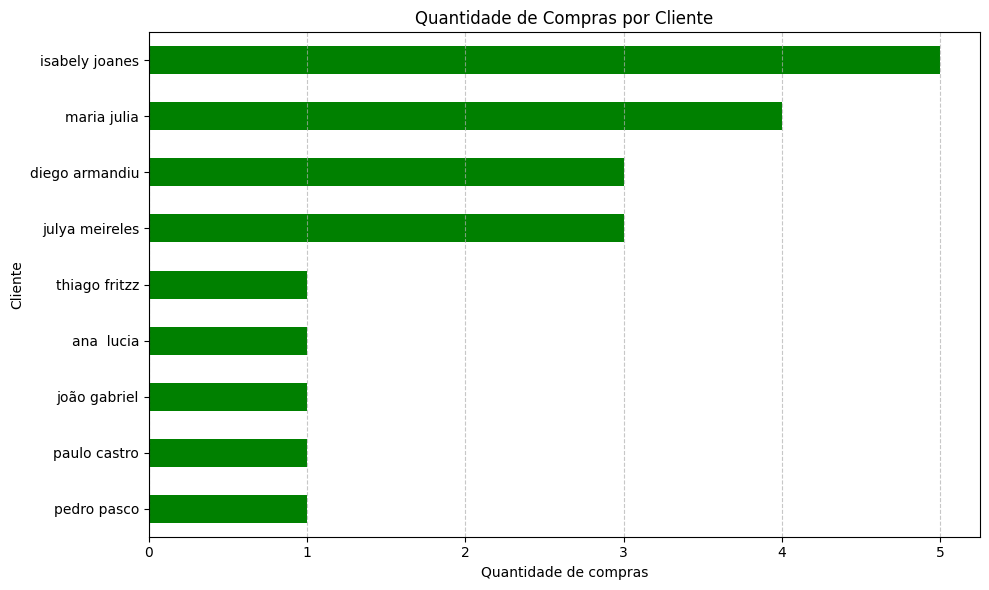

In [178]:
# Gráfico com os resultados:
plt.figure(figsize=(10, 6))
df_cliente_agrupado["Quantidade de compras"].sort_values(ascending=True).plot(kind="barh", color="green")
plt.title("Quantidade de Compras por Cliente")
plt.xlabel("Quantidade de compras")
plt.ylabel("Cliente")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

